# Import data

In [42]:
import pandas as pd
sales=pd.read_csv("data/data_processed.csv")
sales

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,2018-08-27,44,20.0,53.99,42.38,43.99,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4308,2018-09-03,44,14.0,52.99,53.99,42.38,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4309,2018-09-10,44,22.0,44.99,52.99,53.99,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4310,2018-09-17,44,28.0,42.99,44.99,52.99,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
sales.head(5)

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# II/Common Demand Prediction Methods

## 1) Primer: Preidicting the sales of one SKU

In [44]:
import numpy as np
data = sales[sales.sku==11].sort_values(by=["week"])
colnames = [i for i in data.columns if i not in ["week","weekly_sales","sku"]]
data

X_primer = data[colnames]
y_primer = data.weekly_sales

In [45]:
X_primer

,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
980,31.99,32.99,32.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
981,30.99,31.99,32.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
982,30.99,30.99,31.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
983,30.99,30.99,30.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
984,29.31,30.99,30.99,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,21.99,21.46,18.10,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1074,19.28,21.99,21.46,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1075,19.61,19.28,21.99,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1076,19.04,19.61,19.28,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
X_train_primer

,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
980,31,32,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
981,30,31,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
982,30,30,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
983,30,30,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
984,29,30,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,31,29,30,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1044,30,31,29,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1045,30,30,31,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1046,30,30,30,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
X_test_primer

,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,month_5,month_6,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
1048,29,31,30,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1049,31,29,31,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1050,30,31,29,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1051,23,30,31,0,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1052,17,23,30,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1053,28,17,23,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1054,29,28,17,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1055,30,29,28,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1056,31,30,29,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1057,30,31,30,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
from statsmodels.regression.linear_model import OLS
model = OLS(y_train_primer, X_train_primer)
model = model.fit()
y_pred_primer = list(model.predict(X_test_primer))

In [49]:
from sklearn.metrics import r2_score, mean_squared_error
print('Out of sample R2:',round(r2_score(y_test_primer, np.array(y_pred_primer)),3))
print('OOS MSE:', round(mean_squared_error(y_test_primer, np.array(y_pred_primer)),3))

Out of sample R2: 0.247
OOS MSE: 4055.457


In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weekly_sales   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.179
Date:                Sun, 13 Aug 2023   Prob (F-statistic):              0.316
Time:                        13:44:37   Log-Likelihood:                -347.68
No. Observations:                  68   AIC:                             729.4
Df Residuals:                      51   BIC:                             767.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
price                                            -6.3736      4.941     -1.290      0.203     -16.292       3.545
price-1                                          -3.2960      4.932     -0.668      0.507     -13.197       6.605
price-2                                          -1.3521      5.156     -0.262      0.794     -11.702       8.998
feat_main_page                                   59.7841     55.091      1.085      0.283     -50.816     170.385
trend                                             6.8618     23.891      0.287      0.775     -41.102      54.825
month_2                                           2.3456     23.023      0.102      0.919     -43.874      48.565
month_3                                          -0.3965     28.953     -0.014      0.989     -58.522      57.729
month_4                                          -3.5201     28.922     -0.122      0.904     -61.584      54.544
month_5                                          47.2623     26.883      1.758      0.085      -6.707     101.232
month_6                                          24.0787     28.855      0.834      0.408     -33.850      82.007
month_7                                          33.3887     35.527      0.940      0.352     -37.935     104.713
month_8                                         -17.8738     57.057     -0.313      0.755    -132.420      96.672
month_9                                         -20.4918     38.096     -0.538      0.593     -96.972      55.989
month_10                                         11.9041     30.605      0.389      0.699     -49.537      73.345
month_11                                          5.8014     34.027      0.170      0.865     -62.511      74.114
month_12                                          2.4511     39.739      0.062      0.951     -77.329      82.231
functionality_02.Portable smartphone chargers          0          0        nan        nan           0           0
functionality_03.Bluetooth speakers                    0          0        nan        nan           0           0
functionality_04.Selfie sticks                         0          0        nan        nan           0           0
functionality_05.Bluetooth tracker                     0          0        nan        nan           0           0
functionality_06.Mobile phone accessories              0          0        nan        nan           0           0
functionality_07.Headphones                            0          0        nan        nan           0           0
functionality_08.Digital pencils                       0          0        nan        nan           0           0
functionality_09.Smartphone stands                     0          0        nan        nan           0           0
funct

In [51]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
print(scaler.fit(X_train_primer[['price','price-1','price-2']]))
X_train_primer_price_std = scaler.transform(X_train_primer[['price','price-1','price-2']])

StandardScaler()


## 2) Structuring dataset 

In [52]:
skuSet = list(sales.sku.unique())
skuData = {}
colnames = [i for i in sales.columns if i not in ["week","weekly_sales","sku"]]
for i in skuSet:
  df_i = sales[sales.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [54]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) 
  y_train += list(y_train_i) 


## 3) Centralized 

In [55]:
import time
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

from sklearn.linear_model import LinearRegression
model_cen = LinearRegression().fit(X_cen_train, y_train)

from sklearn.metrics import r2_score, mean_squared_error
print('OOS R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))  
print('OOS MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec.")

OOS R2: 0.114
OOS MSE: 98086.301
Time to compute: 0.018  sec.


In [56]:
res=pd.DataFrame(index=['R2'])
res

""
R2


In [57]:
res['centralized']=[r2_score(y_test, model_cen.predict(X_cen_test))]
res

,centralized
R2,0.114249


## 4) Decentralized

In [58]:
tZero=time.time()

y_pred = []
skuModels = {}

for i in skuSet:
    #one model for each item, fitted on training set
    model_i = OLS(y_dict[i]['train'], X_dict[i]['train'], hasconst = False)
    skuModels[i] = model_i.fit()

    #compute and concatenate prediction of the model i on item i
    y_pred += list(skuModels[i].predict(X_dict[i]['test']))


#computing overall performance metrics on y_pred and y_test:
print('OOS R2:',round(r2_score(y_test, np.array(y_pred)),3))
print('OOS MSE:', round(mean_squared_error(y_test, np.array(y_pred)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.517
OOS MSE: 53537.475
Time to compute: 0.113  sec


In [59]:
res['decentralized']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized
R2,0.114249,0.516539


## 5) Feature Selection and Regularization in the Decentralized model


### a) Subset Selection

In [60]:
def forward_stepwise_selection(data,p,metric='aic'):
    """

    Perform selection of p features on a dataset 


    p: highest number of features used to train each model
    metric: aic (default) or bic

    Returns best trained model and list of features selected

    """

    available_features = set(data.columns)

    selected = []
    current_score, best_new_score = 1000, 1000

    overall_selected = []
    while available_features and current_score == best_new_score and len(selected)<p:

        scores_with_candidates = []
        for candidate in available_features:
            
            selected_candidates = selected.copy()
            
            selected_candidates.append(candidate)
            # print(selected_candidates)
            if metric == 'aic':
              score = OLS(y_train_primer, X_train_primer[selected_candidates]).fit().aic
            elif metric == 'bic':
              score = OLS(y_train_primer, X_train_primer[selected_candidates]).fit().bic

            else:
              print('Metric not supported')
              break
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate = scores_with_candidates.pop()

        available_features.remove(best_candidate) #remove the selected feature from available features
        selected.append(best_candidate) #add it to our list of features selected

        # display results at each stage
        print(str(len(selected))+'. :',selected,best_new_score)

        if current_score > best_new_score: #if this model generates an improvement we record it

            current_score = best_new_score
            overall_selected = selected.copy()
            

    model = OLS(y_train_primer, X_train_primer[overall_selected]).fit()
    return(model,overall_selected)

In [61]:
model,selected = forward_stepwise_selection(X_train_primer,6,'aic')

print(selected)
print(model.aic)

1. : ['vendor_10'] 718.7550022483708
2. : ['vendor_10', 'price'] 711.4034867877373
3. : ['vendor_10', 'price', 'month_5'] 709.2697502581306
4. : ['vendor_10', 'price', 'month_5', 'month_7'] 708.8466697893904
5. : ['vendor_10', 'price', 'month_5', 'month_7', 'color_blue'] 708.8466697893905
['vendor_10', 'price', 'month_5', 'month_7']
708.8466697893904


In [62]:
model = OLS(y_train_primer, X_train_primer[selected])
model = model.fit()
y_pred_primer = list(model.predict(X_test_primer[selected]))

print('OOS R2:',round(r2_score(y_test_primer, np.array(y_pred_primer)),3))
print('OOS MSE:', round(mean_squared_error(y_test_primer, np.array(y_pred_primer)),3))

OOS R2: 0.301
OOS MSE: 3766.727


In [63]:
model,selected = forward_stepwise_selection(X_train_primer,6,'bic')

print(selected)
print(model.bic)

1. : ['vendor_10'] 720.9745099535469
2. : ['vendor_10', 'price'] 715.8425021980895
3. : ['vendor_10', 'price', 'color_blue'] 715.8425021980895
4. : ['vendor_10', 'price', 'color_blue', 'color_gold'] 715.8425021980894
5. : ['vendor_10', 'price', 'color_blue', 'color_gold', 'color_green'] 715.8425021980894
6. : ['vendor_10', 'price', 'color_blue', 'color_gold', 'color_green', 'color_grey'] 715.8425021980894
['vendor_10', 'price', 'color_blue', 'color_gold']
715.8425021980894


In [64]:
model = OLS(y_train_primer, X_train_primer[selected])
model = model.fit()
y_pred_primer = list(model.predict(X_test_primer[selected]))
from sklearn.metrics import r2_score, mean_squared_error
print('OOS R2:',round(r2_score(y_test_primer, np.array(y_pred_primer)),3))
print('OOS MSE:', round(mean_squared_error(y_test_primer, np.array(y_pred_primer)),3))

OOS R2: 0.285
OOS MSE: 3855.191


### b) Lasso Technique


#### i) Lasso for SKU 11

In [65]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=1.0)
lasso_model.fit(X_train_primer,y_train_primer)

Lasso()

In [66]:
lasso_df = pd.DataFrame(list(zip(X_primer.columns,lasso_model.coef_)),columns=["feature","coefficient"])
lasso_df[lasso_df.coefficient !=0]

,feature,coefficient
0,price,-6.325453
1,price-1,-2.822020
2,price-2,-0.250756
4,trend,1.824828
8,month_5,26.992700
10,month_7,15.962160
12,month_9,-6.139129


In [67]:
y_pred_primer = list(lasso_model.predict(X_test_primer))
print('OOS R2:',round(r2_score(y_test_primer, np.array(y_pred_primer)),3))
print('OOS MSE:', round(mean_squared_error(y_test_primer, np.array(y_pred_primer)),3))

OOS R2: 0.305
OOS MSE: 3744.814


#### ii) Decentralized Lasso

In [68]:
tZero=time.time()

y_pred = []

skuModelsLasso = {}

for i in skuSet:
   
  model_i = linear_model.Lasso(alpha=0.1)
 
  skuModelsLasso[i] = model_i.fit(X_dict[i]["train"],y_dict[i]["train"])
  y_pred += list(skuModelsLasso[i].predict(X_dict[i]['test']))

print('OOS R2:',round(r2_score(y_test, np.array(y_pred)),3))
print('OOS MSE:', round(mean_squared_error(y_test, np.array(y_pred)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.523
OOS MSE: 52833.745
Time to compute: 0.049  sec


In [69]:
res['decentralized_lasso']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized,decentralized_lasso
R2,0.114249,0.516539,0.522894


### c) Ridge Technique


#### i) Ridge on SKU 11


In [70]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train_primer, y_train_primer)

Ridge(alpha=1)

#### ii) Decentralized Ridge

In [71]:
tZero=time.time()

y_pred = []

skuModelsRidge = {}

for i in skuSet:
   
  model_i = Ridge(alpha=1)
 
  skuModelsRidge[i] = model_i.fit(X_dict[i]["train"],y_dict[i]["train"])
  y_pred += list(skuModelsRidge[i].predict(X_dict[i]['test']))

print('OOS R2:',round(r2_score(y_test, np.array(y_pred)),3))
print('OOS MSE:', round(mean_squared_error(y_test, np.array(y_pred)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.571
OOS MSE: 47518.987
Time to compute: 0.042  sec


In [72]:
res['decentralized_ridge']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge
R2,0.114249,0.516539,0.522894,0.570888


### d) ElasticNet Technique


#### i) ElasticNet on SKU 11

In [73]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha= 0.05,l1_ratio=0.3)
elastic.fit(X_train_primer, y_train_primer)

ElasticNet(alpha=0.05, l1_ratio=0.3)

#### ii) Decentralized Elastic Net

In [74]:
tZero=time.time()

y_pred = []
skuModelsElastic = {}

for i in skuSet:
  elastic = ElasticNet(alpha= 0.05,l1_ratio=0.3)
  skuModelsElastic[i] = elastic.fit(X_dict[i]["train"],y_dict[i]["train"])
  y_pred += list(skuModelsElastic[i].predict(X_dict[i]['test']))

print('OOS R2:',round(r2_score(y_test, np.array(y_pred)),3))
print('OOS MSE:', round(mean_squared_error(y_test, np.array(y_pred)),3))

t = time.time()-tZero
print("Time to compute",round(t,3)," sec")

OOS R2: 0.585
OOS MSE: 45992.958
Time to compute 0.047  sec


In [75]:
res['decentralized_elasticnet']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet
R2,0.114249,0.516539,0.522894,0.570888,0.584669


## 6) Log-transformations





In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
color=sns.color_palette(palette='colorblind')[3]

### a) Log-transformation on the price variables

In [78]:
df_plots=pd.DataFrame()
df_plots['sales']=sales['weekly_sales']
df_plots['price']=sales['price']
df_plots['logprice']=np.log(sales['price'])
df_plots.head()

,sales,price,logprice
0,110.0,10.24,2.326302
1,127.0,8.27,2.112635
2,84.0,8.83,2.178155
3,87.0,8.98,2.195000
4,64.0,10.40,2.341806


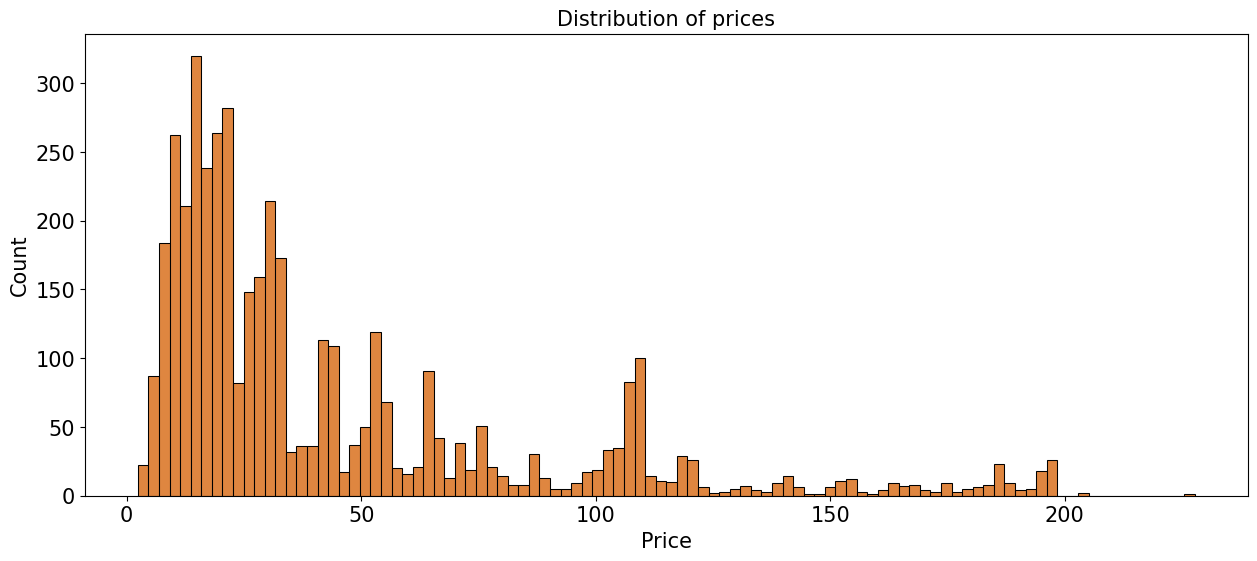

In [79]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
graph = sns.histplot(data=df_plots, x="price", bins=100, color=color)
plt.title('Distribution of prices', fontsize=15)
plt.xlabel("Price")
plt.savefig("price_distrib.png",dpi=400)
plt.show()

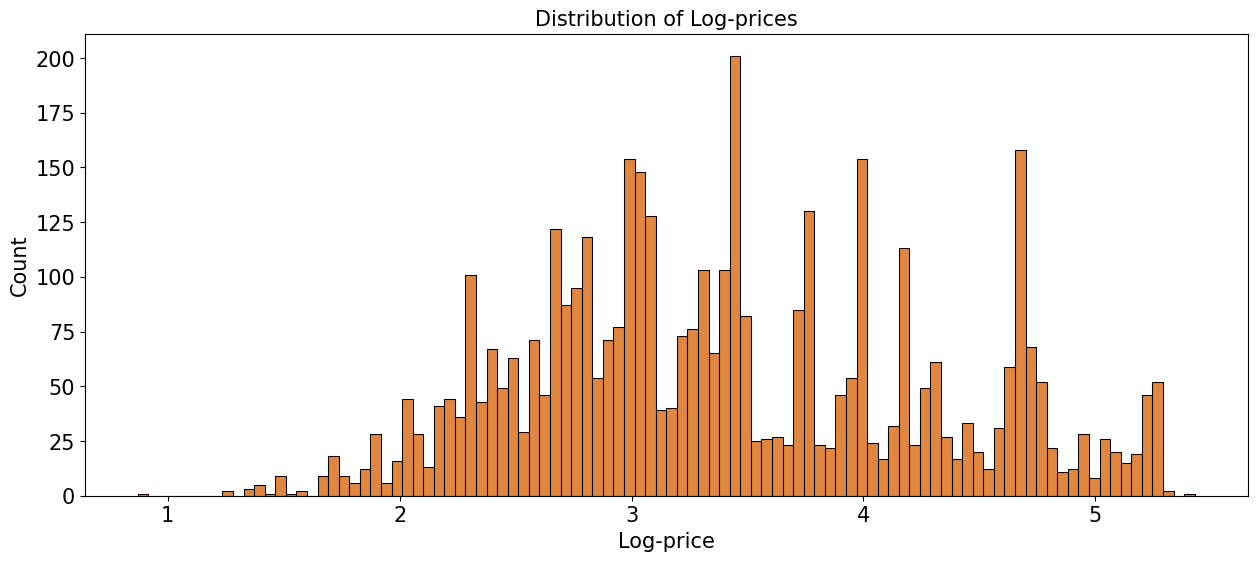

In [80]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
graph = sns.histplot(data=df_plots, x="logprice", bins=100, color=color)
plt.title('Distribution of Log-prices', fontsize=15)
plt.xlabel("Log-price")
plt.savefig("logprice_distrib.png",dpi=400)
plt.show()

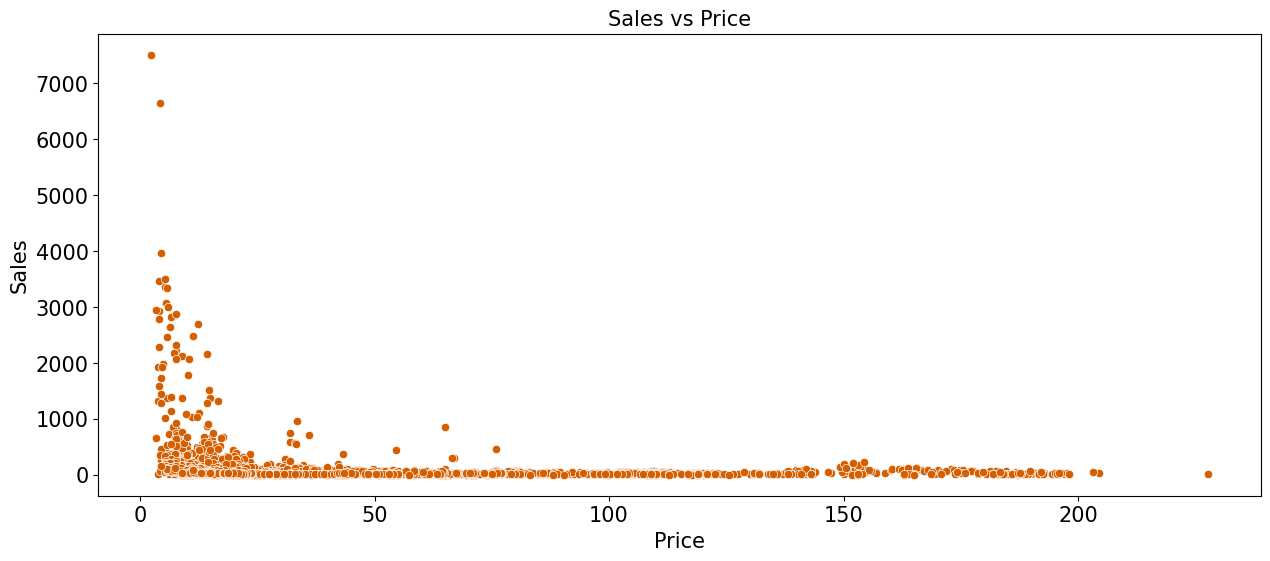

In [81]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
plt.title('Sales vs Price', fontsize=15)
sns.scatterplot(data=df_plots, x="price", y="sales", color=color)
plt.xlabel("Price")
plt.ylabel("Sales")
plt.savefig("sales_price.png",dpi=400)
plt.show()

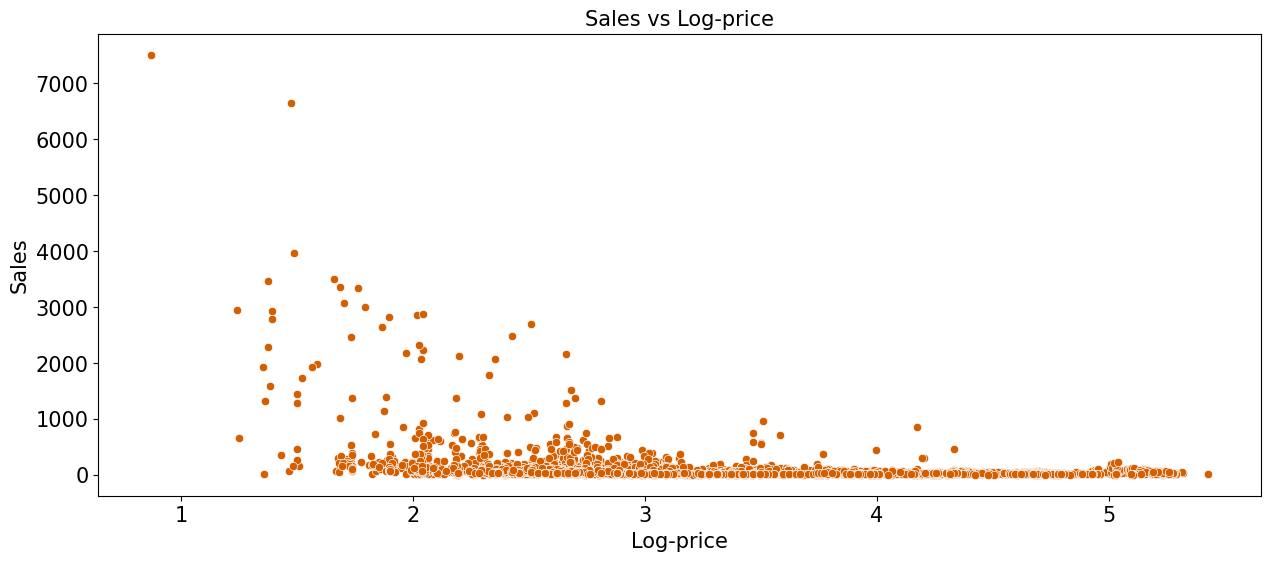

In [82]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
plt.title('Sales vs Log-price', fontsize=15)
sns.scatterplot(data=df_plots, x="logprice", y="sales", color=color)
plt.xlabel("Log-price")
plt.ylabel("Sales")
plt.savefig("sales_logprice.png",dpi=400)
plt.show()

### b) Log-transformation on the target variable

In [83]:
df_plots['logsales']=np.log(sales['weekly_sales']+1)
df_plots.head()

,sales,price,logprice,logsales
0,110.0,10.24,2.326302,4.709530
1,127.0,8.27,2.112635,4.852030
2,84.0,8.83,2.178155,4.442651
3,87.0,8.98,2.195000,4.477337
4,64.0,10.40,2.341806,4.174387


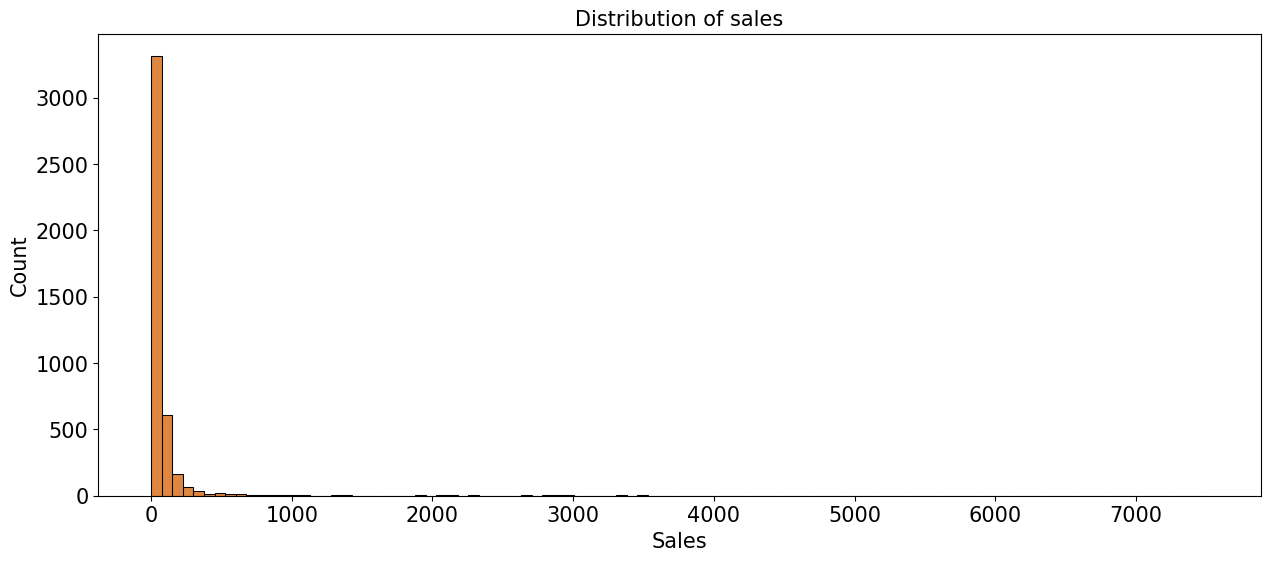

In [84]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
graph = sns.histplot(data=df_plots, x="sales", bins=100, color=color)
plt.title('Distribution of sales', fontsize=15)
plt.xlabel("Sales")
plt.savefig("sales_distrib.png",dpi=400)
plt.show()

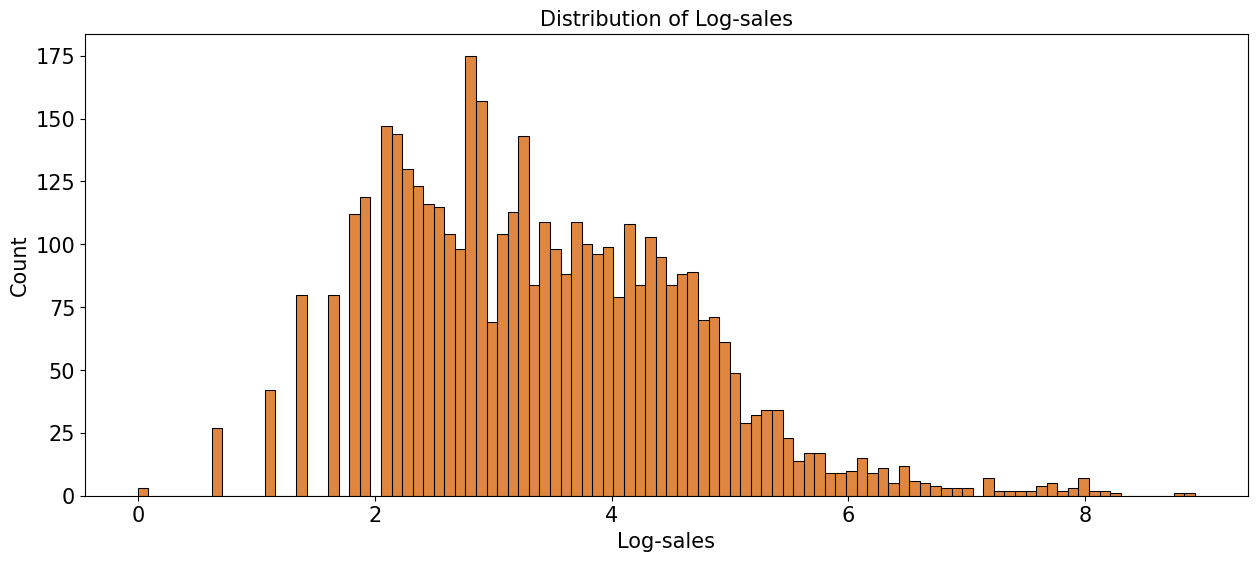

In [85]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
graph = sns.histplot(data=df_plots, x="logsales", bins=100, color=color)
plt.title('Distribution of Log-sales', fontsize=15)
plt.xlabel("Log-sales")
plt.savefig("logsales_distrib.png",dpi=400)
plt.show()

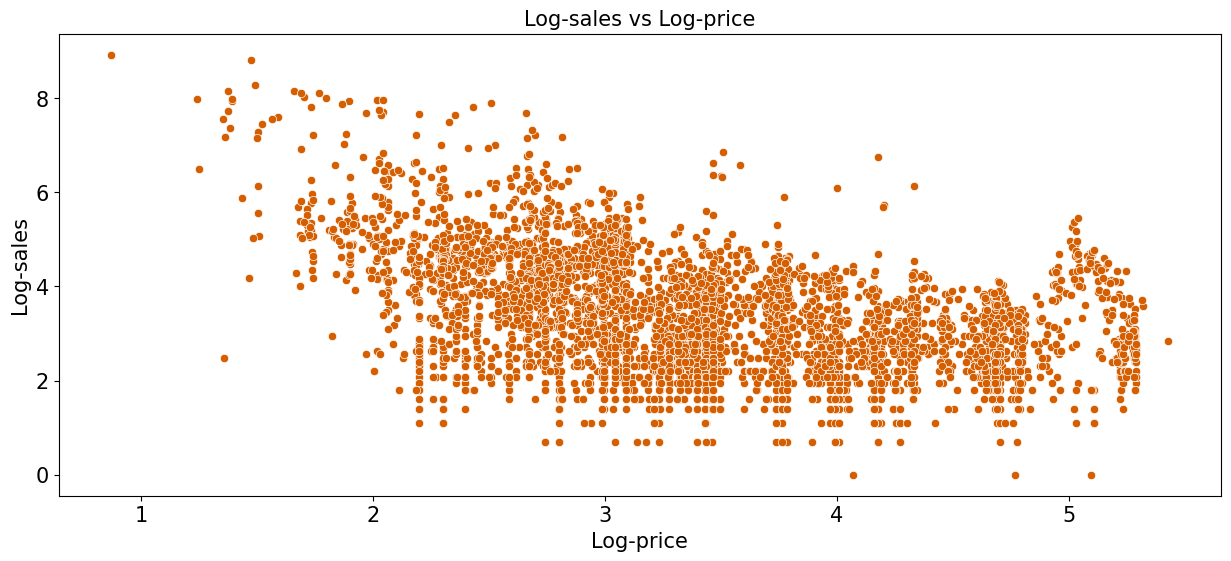

In [86]:
plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 15})
plt.title('Log-sales vs Log-price', fontsize=15)
sns.scatterplot(data=df_plots, x="logprice", y="logsales", color=color)
plt.xlabel("Log-price")
plt.ylabel("Log-sales")
plt.savefig("logsales_logprice.png",dpi=400)
plt.show()

### c) Applying transformations

Log-lin:

In [87]:
sales_log_lin = sales.copy()
sales_log_lin['price']=np.log(sales_log_lin['price'])
sales_log_lin['price-1']=np.log(sales_log_lin['price-1'])
sales_log_lin['price-2']=np.log(sales_log_lin['price-2'])
sales_log_lin.head()

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,110.0,2.326302,2.288486,2.318458,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,127.0,2.112635,2.326302,2.288486,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,84.0,2.178155,2.112635,2.326302,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,87.0,2.195000,2.178155,2.112635,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,64.0,2.341806,2.195000,2.178155,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [88]:
skuSet = list(sales.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales.columns if i not in ["week","weekly_sales","sku"]] 
for i in skuSet:
  df_i = sales_log_lin[sales_log_lin.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [89]:
# testing data dictionary
X_dict = {}
y_dict = {}

skuModels = {}
y_pred = []
y_test = []
y_train = []

for i in skuSet:

    X_train_i,X_test_i = np.split(skuData[i]["X"], [68])
    y_train_i,y_test_i = np.split(skuData[i]["y"], [68])

    X_dict[i] = {'train': X_train_i, 'test': X_test_i}
    y_dict[i] = {'train': y_train_i, 'test': y_test_i}
    
    model_i = OLS(y_train_i, X_train_i)
    skuModels[i] = model_i.fit()
    y_pred += list(skuModels[i].predict(X_test_i))

    y_test += list(y_test_i)
    y_train += list(y_train_i)

y_train = np.array(y_train)
y_test = np.array(y_test)

print('OOS R2:',round(r2_score(y_test, np.array(y_pred)),3))

OOS R2: 0.558


In [90]:
res['decentralized_log_lin']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet,decentralized_log_lin
R2,0.114249,0.516539,0.522894,0.570888,0.584669,0.558297


Log-log:

In [91]:
sales_log_log = sales.copy()
sales_log_log['price']=np.log(sales_log_log['price'])
sales_log_log['price-1']=np.log(sales_log_log['price-1'])
sales_log_log['price-2']=np.log(sales_log_log['price-2'])
sales_log_log['weekly_sales']=np.log(sales_log_log['weekly_sales']+1)
sales_log_log.head()

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,color_white,vendor_2,vendor_3,vendor_4,vendor_5,vendor_6,vendor_7,vendor_8,vendor_9,vendor_10
0,2016-11-14,1,4.709530,2.326302,2.288486,2.318458,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2016-11-21,1,4.852030,2.112635,2.326302,2.288486,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2016-11-28,1,4.442651,2.178155,2.112635,2.326302,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2016-12-05,1,4.477337,2.195000,2.178155,2.112635,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016-12-12,1,4.174387,2.341806,2.195000,2.178155,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [92]:
skuSet = list(sales.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales.columns if i not in ["week","weekly_sales","sku"]] #the names of columns do not change
for i in skuSet:
  df_i = sales_log_log[sales_log_log.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [93]:
# testing data dictionary
X_dict = {}
y_dict = {}

skuModels = {}
y_pred_log = []
y_train_log = []
y_test_log = []

for i in skuSet:

    X_train_i,X_test_i = np.split(skuData[i]["X"], [68])
    y_train_i,y_test_i = np.split(skuData[i]["y"], [68])

    X_dict[i] = {'train': X_train_i, 'test': X_test_i}
    y_dict[i] = {'train': y_train_i, 'test': y_test_i}
    
    model_i = OLS(y_train_i, X_train_i, hasconst = False)
    skuModels[i] = model_i.fit()

    y_pred_log += list(skuModels[i].predict(X_test_i))
    y_train_log += list(y_train_i)
    y_test_log += list(y_test_i)

y_train = np.array(y_train)
## Don’t forget to take the exponential of the predicted values
y_pred=np.exp(y_pred_log)-1
y_test=np.exp(y_test_log)-1
## Then compute the R2
print('OOS R2:',r2_score(y_test, np.array(y_pred)))

OOS R2: 0.19968941829716347


In [94]:
res['decentralized_log_log']=[r2_score(y_test, np.array(y_pred))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet,decentralized_log_lin,decentralized_log_log
R2,0.114249,0.516539,0.522894,0.570888,0.584669,0.558297,0.199689


## 7) Centralized with SKU fixed effects

In [95]:
sales_fe_sku = sales.copy()
sales_fe_sku = pd.get_dummies(data=sales_fe_sku, columns=['sku'])
sales_fe_sku["sku"] = sales["sku"] 
sales_fe_sku.head(5)

,week,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,...,sku_36,sku_37,sku_38,sku_39,sku_40,sku_41,sku_42,sku_43,sku_44,sku
0,2016-11-14,110.0,10.24,9.86,10.16,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
1,2016-11-21,127.0,8.27,10.24,9.86,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
2,2016-11-28,84.0,8.83,8.27,10.24,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
3,2016-12-05,87.0,8.98,8.83,8.27,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
4,2016-12-12,64.0,10.40,8.98,8.83,1,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1


In [96]:
skuSet = list(sales_fe_sku.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales_fe_sku.columns if i not in ["week","weekly_sales","sku"]]
for i in skuSet:
  df_i = sales_fe_sku[sales_fe_sku.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [97]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) 
  y_train += list(y_train_i) 

In [98]:
import time
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

model_cen = LinearRegression().fit(X_cen_train, y_train)
print('OOS R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))  
print('MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.298
MSE: 77763.01
Time to compute: 0.083  sec


In [99]:
fixed_effect_sku = pd.DataFrame(zip(colnames,model_cen.coef_),columns=["feature","coef"])
fixed_effect_sku

,feature,coef
0,price,-1.705295e+00
1,price-1,-1.654134e-01
2,price-2,8.655293e-01
3,feat_main_page,6.151674e+01
4,trend,-1.884215e+00
...,...,...
84,sku_40,-1.110735e+12
85,sku_41,-6.342016e+11
86,sku_42,1.798058e+11
87,sku_43,4.535285e+11


In [100]:
res['Centralized - SKU FE']=[r2_score(y_test, model_cen.predict(X_cen_test))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet,decentralized_log_lin,decentralized_log_log,Centralized - SKU FE
R2,0.114249,0.516539,0.522894,0.570888,0.584669,0.558297,0.199689,0.297775


## 8) Centralized with price fixed effects 

In [101]:
sales_fe_price = sales.copy()

In [102]:
for i in range(1,45):
  sales_fe_price["price_fixed_effect_"+str(i)] = sales_fe_sku["price"]*sales_fe_sku["sku_"+str(i)]
sales_fe_price.head(5)

,week,sku,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,...,price_fixed_effect_35,price_fixed_effect_36,price_fixed_effect_37,price_fixed_effect_38,price_fixed_effect_39,price_fixed_effect_40,price_fixed_effect_41,price_fixed_effect_42,price_fixed_effect_43,price_fixed_effect_44
0,2016-11-14,1,110.0,10.24,9.86,10.16,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-11-21,1,127.0,8.27,10.24,9.86,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-11-28,1,84.0,8.83,8.27,10.24,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-12-05,1,87.0,8.98,8.83,8.27,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-12-12,1,64.0,10.40,8.98,8.83,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
sales_fe_price[sales_fe_price.sku==5][["week","sku","price_fixed_effect_5","price_fixed_effect_6"]]

,week,sku,price_fixed_effect_5,price_fixed_effect_6
392,2016-11-14,5,8.08,0.0
393,2016-11-21,5,8.99,0.0
394,2016-11-28,5,8.10,0.0
395,2016-12-05,5,6.18,0.0
396,2016-12-12,5,8.06,0.0
...,...,...,...,...
485,2018-08-27,5,10.09,0.0
486,2018-09-03,5,10.99,0.0
487,2018-09-10,5,8.99,0.0
488,2018-09-17,5,8.99,0.0


In [104]:
sales_fe_price[sales_fe_price.sku==6][["week","sku","price_fixed_effect_5","price_fixed_effect_6"]]

,week,sku,price_fixed_effect_5,price_fixed_effect_6
490,2016-11-14,6,0.0,20.99
491,2016-11-21,6,0.0,34.18
492,2016-11-28,6,0.0,20.94
493,2016-12-05,6,0.0,19.86
494,2016-12-12,6,0.0,17.10
...,...,...,...,...
583,2018-08-27,6,0.0,41.99
584,2018-09-03,6,0.0,41.99
585,2018-09-10,6,0.0,35.22
586,2018-09-17,6,0.0,63.99


In [105]:
skuSet = list(sales.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales_fe_price.columns if i not in ["week","weekly_sales","sku","price"]] #remove price from the features

for i in skuSet:
 df_i = sales_fe_price[sales_fe_price.sku == i]
 skuData[i] = {'X': df_i[colnames].values,
               'y': df_i.weekly_sales.values}

In [106]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) 
  y_train += list(y_train_i) 

In [107]:
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

model_cen = LinearRegression().fit(X_cen_train, y_train)
print('OOS R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))  
print('OOS MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.367
OOS MSE: 70077.111
Time to compute: 0.051  sec


In [108]:
res['Centralized - Price FE']=[r2_score(y_test, model_cen.predict(X_cen_test))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet,decentralized_log_lin,decentralized_log_log,Centralized - SKU FE,Centralized - Price FE
R2,0.114249,0.516539,0.522894,0.570888,0.584669,0.558297,0.199689,0.297775,0.367181


## 9) Centralized with SKU + price fixed effects 

In [109]:
sales_fe_sku_price = sales_fe_sku.copy()
for i in range(1,45):
  sales_fe_sku_price["price_fixed_effect_"+str(i)] = sales_fe_sku_price["price"]*sales_fe_sku_price["sku_"+str(i)]
sales_fe_sku_price.head(5)

,week,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,...,price_fixed_effect_35,price_fixed_effect_36,price_fixed_effect_37,price_fixed_effect_38,price_fixed_effect_39,price_fixed_effect_40,price_fixed_effect_41,price_fixed_effect_42,price_fixed_effect_43,price_fixed_effect_44
0,2016-11-14,110.0,10.24,9.86,10.16,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-11-21,127.0,8.27,10.24,9.86,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-11-28,84.0,8.83,8.27,10.24,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-12-05,87.0,8.98,8.83,8.27,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-12-12,64.0,10.40,8.98,8.83,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
skuSet = list(sales.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales_fe_sku_price.columns if i not in ["week","weekly_sales","sku","price"]]
for i in skuSet:
  df_i = sales_fe_sku_price[sales_fe_sku_price.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [111]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) 
  y_train += list(y_train_i) 

In [112]:
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

model_cen = LinearRegression(fit_intercept=True).fit(X_cen_train, y_train)
print('OOS R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))  
print('OOS MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.58
OOS MSE: 46528.813
Time to compute: 0.17  sec


In [113]:
pd.DataFrame(zip(colnames,model_cen.coef_),columns=["feature","coef"])

,feature,coef
0,price-1,-0.218264
1,price-2,0.818667
2,feat_main_page,7.020043
3,trend,16.808084
4,month_2,-5.520558
...,...,...
127,price_fixed_effect_40,-10.024002
128,price_fixed_effect_41,-4.358890
129,price_fixed_effect_42,0.068357
130,price_fixed_effect_43,-0.068927


In [114]:
res['Centralized - SKU + Price FE']=[r2_score(y_test, model_cen.predict(X_cen_test))]
res

,centralized,decentralized,decentralized_lasso,decentralized_ridge,decentralized_elasticnet,decentralized_log_lin,decentralized_log_log,Centralized - SKU FE,Centralized - Price FE,Centralized - SKU + Price FE
R2,0.114249,0.516539,0.522894,0.570888,0.584669,0.558297,0.199689,0.297775,0.367181,0.57983


## 10) Decentralized Approach with Seasonality at Department Level

In [115]:
sales_seas = sales_fe_sku.copy()

In [116]:
sales_seas.columns

Index(['week', 'weekly_sales', 'price', 'price-1', 'price-2', 'feat_main_page',
       'trend', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'functionality_02.Portable smartphone chargers',
       'functionality_03.Bluetooth speakers', 'functionality_04.Selfie sticks',
       'functionality_05.Bluetooth tracker',
       'functionality_06.Mobile phone accessories',
       'functionality_07.Headphones', 'functionality_08.Digital pencils',
       'functionality_09.Smartphone stands', 'functionality_10.VR headset',
       'functionality_11.Fitness trackers', 'functionality_12.Flash drives',
       'color_blue', 'color_gold', 'color_green', 'color_grey', 'color_none',
       'color_pink', 'color_purple', 'color_red', 'color_white', 'vendor_2',
       'vendor_3', 'vendor_4', 'vendor_5', 'vendor_6', 'vendor_7', 'vendor_8',
       'vendor_9', 'vendor_10', 'sku_1', 'sku_2', 'sku_3', 'sku_4', 'sku_5',
  

In [117]:
colnames_to_fix = [i for i in sales.columns if i not in ["week","weekly_sales","sku",
                                                         'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
                                                         'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']]
colnames_to_fix

['price',
 'price-1',
 'price-2',
 'feat_main_page',
 'trend',
 'functionality_02.Portable smartphone chargers',
 'functionality_03.Bluetooth speakers',
 'functionality_04.Selfie sticks',
 'functionality_05.Bluetooth tracker',
 'functionality_06.Mobile phone accessories',
 'functionality_07.Headphones',
 'functionality_08.Digital pencils',
 'functionality_09.Smartphone stands',
 'functionality_10.VR headset',
 'functionality_11.Fitness trackers',
 'functionality_12.Flash drives',
 'color_blue',
 'color_gold',
 'color_green',
 'color_grey',
 'color_none',
 'color_pink',
 'color_purple',
 'color_red',
 'color_white',
 'vendor_2',
 'vendor_3',
 'vendor_4',
 'vendor_5',
 'vendor_6',
 'vendor_7',
 'vendor_8',
 'vendor_9',
 'vendor_10']

In [118]:
sales_seasonality = sales_fe_sku.copy()

for feature in colnames_to_fix:
  for i in range(1,45):
    sales_seasonality[str(feature)+"_fixed_effect_"+str(i)] = sales_seasonality[feature]*sales_seasonality["sku_"+str(i)]
sales_seasonality.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_4440\284434497.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sales_seasonality[str(feature)+"_fixed_effect_"+str(i)] = sales_seasonality[feature]*sales_seasonality["sku_"+str(i)]
C:\Users\User\AppData\Local\Temp\ipykernel_4440\284434497.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sales_seasonality[str(feature)+"_fixed_effect_"+str(i)] = sales_seasonality[feature]*sales_seasonality["sku_"+str(i)]
C:\Users\User\AppData\Local\Temp\ipykernel_4440\284434497.py:5: PerformanceWar

,week,weekly_sales,price,price-1,price-2,feat_main_page,trend,month_2,month_3,month_4,...,vendor_10_fixed_effect_35,vendor_10_fixed_effect_36,vendor_10_fixed_effect_37,vendor_10_fixed_effect_38,vendor_10_fixed_effect_39,vendor_10_fixed_effect_40,vendor_10_fixed_effect_41,vendor_10_fixed_effect_42,vendor_10_fixed_effect_43,vendor_10_fixed_effect_44
0,2016-11-14,110.0,10.24,9.86,10.16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-11-21,127.0,8.27,10.24,9.86,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-11-28,84.0,8.83,8.27,10.24,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-12-05,87.0,8.98,8.83,8.27,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-12-12,64.0,10.40,8.98,8.83,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
sales_seasonality.columns

Index(['week', 'weekly_sales', 'price', 'price-1', 'price-2', 'feat_main_page',
       'trend', 'month_2', 'month_3', 'month_4',
       ...
       'vendor_10_fixed_effect_35', 'vendor_10_fixed_effect_36',
       'vendor_10_fixed_effect_37', 'vendor_10_fixed_effect_38',
       'vendor_10_fixed_effect_39', 'vendor_10_fixed_effect_40',
       'vendor_10_fixed_effect_41', 'vendor_10_fixed_effect_42',
       'vendor_10_fixed_effect_43', 'vendor_10_fixed_effect_44'],
      dtype='object', length=1588)

In [120]:
skuSet = list(sales.sku.unique()) #the SKU numbers do not change
skuData = {}
colnames = [i for i in sales_seasonality.columns if i not in ["week","weekly_sales","sku"] and i not in colnames_to_fix]
for i in skuSet:
  df_i = sales_seasonality[sales_seasonality.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [121]:
X_dict = {}
y_dict = {}

y_test = []
y_train = []

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [68]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [68]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) 
  y_train += list(y_train_i) 

In [122]:
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

model_cen = LinearRegression(fit_intercept=True).fit(X_cen_train, y_train)
print('OOS R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))  
print('OOS MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

OOS R2: 0.616
OOS MSE: 42515.467
Time to compute: 1.739  sec
